In [15]:
#importing all relevant libraries
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix, mean_squared_error, classification_report
import matplotlib.pyplot as plt

In [ ]:
#Loading and displaying the dataset
heart_disease = pd.read_csv(r"C:\Users\shaum\Downloads\heart (1).csv")
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
y_pred = best_estimator.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
ROC = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
Logloss = log_loss(y_test, y_pred)
root_mean = mean_squared_error(y_test, y_pred)
class_report = classification_report(y_test, y_pred)                              

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {F1}")
print(f"ROC-AUC: {ROC}")
print(f"Confusion Matrix:")
print(conf_matrix)
print(f"Log Loss:{Logloss}")
print(f"RMSE: {root_mean}")
print(f"Classification Report:")
print(class_report)

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 140}
Accuracy: 0.8521739130434782
Precision: 0.8842975206611571
Recall: 0.84251968503937
F1 Score: 0.8629032258064516
ROC-AUC: 0.8532986774711414
Confusion Matrix:
[[ 89  14]
 [ 20 107]]
Log Loss:5.328192240130361
RMSE: 0.14782608695652175
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.88      0.84      0.86       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



Text(0, 0.5, 'Actual')

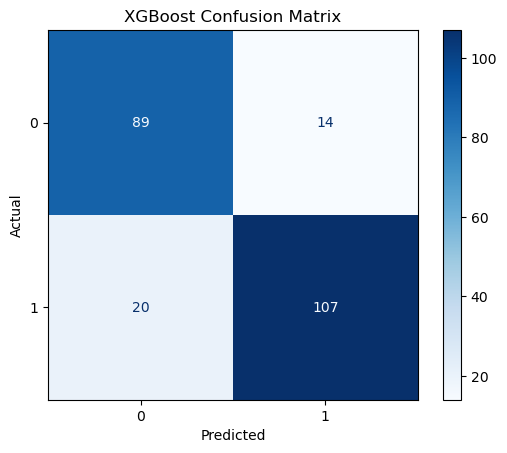

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) #display_labels= model.classes_)
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

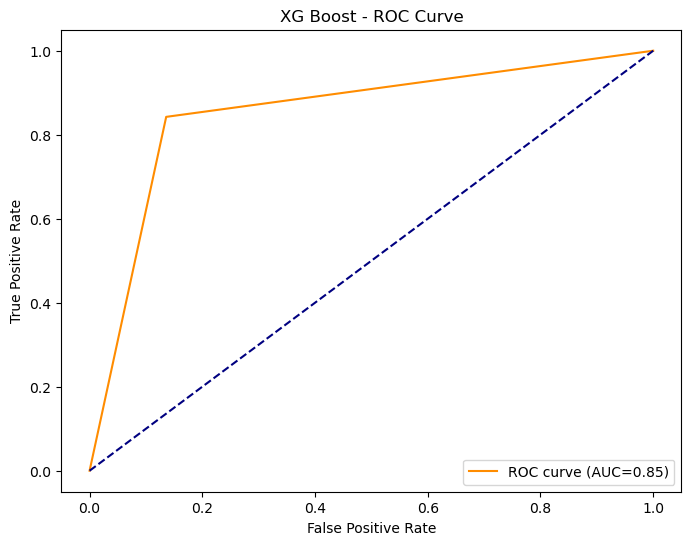

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (AUC={ROC:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost - ROC Curve')
plt.legend(loc="lower right")

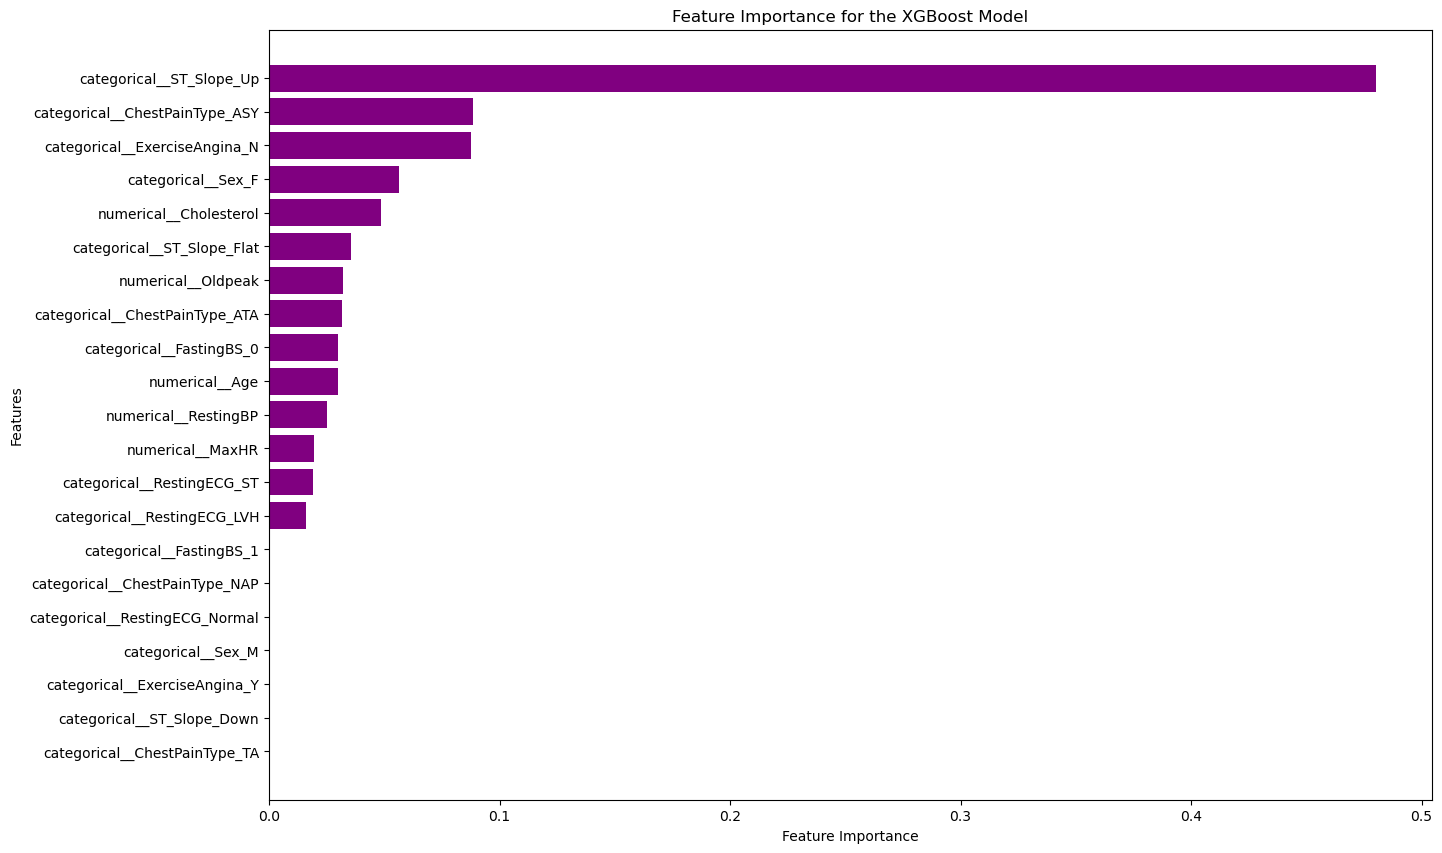

In [125]:
xgb_model = best_estimator.named_steps["model"]
transformed_features = best_estimator.named_steps['preprocessing'].get_feature_names_out()
feature_importance = xgb_model.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = transformed_features[sorted_idx]
sorted_importances = feature_importance[sorted_idx]


plt.figure(figsize=(15, 10))
plt.barh(sorted_features, sorted_importances, color='purple')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for the XGBoost Model")
plt.gca().invert_yaxis()